<a href="https://colab.research.google.com/github/stazam/Exploratory-analysis---House-pricing-public-/blob/main/cvi%C4%8Denie3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.neighbors import KNeighborsClassifier

print(tf.__version__)



2.3.0


In [271]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# add extra dimension (to have one channel)
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [272]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

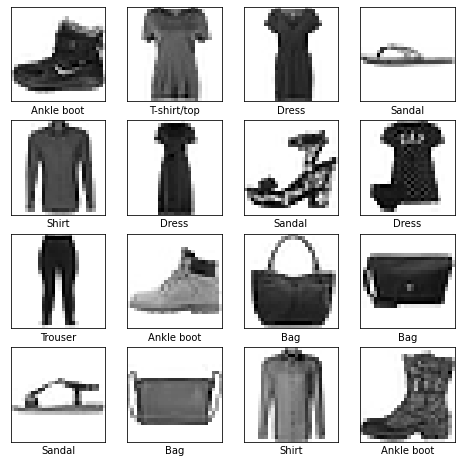

In [273]:
def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  plot_image(x_train[i].squeeze(), clothes_labels[y_train[i]])

In [274]:
# Normalize values from [0, 255] to [0, 1] interval
x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

y_train.shape

(60000, 10)

In [275]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

In [308]:
cnn_model = keras.Sequential([
      layers.Conv2D(filters = 32, kernel_size = (3,3),input_shape=(28,28,1), activation = 'relu'),
      layers.Dropout(0.5),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])


Porovnanie jednotlivých architektúr pomocou **accuracy** (na test data set): 

1. (in.shape - 32 - 128 - 10):  **0.9160**
2. (in.shape - 32 - 64 - 128 - 64 - 64 - 10) - **0.9155** 
3. (in.shape - 32 - 32 - 128 - 64 - 10) - **0.9127**
4. (in.shape - 32 - 32 - 128 - 32 - 10) - **0.9106**
5. (in.shape - 32 - 64 - 32 - 10) - **0.8967**
6. (in.shape - 32 - 128 - 64 - 32 - 10) - **0.9037**
7. (in.shape - 32 - 128 - 64 - 64 - 10) - **0.9062**
8. (in.shape - 32 - 128 - 128 - 64 - 10) - **0.9062**

In [309]:
cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [310]:
cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_20 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 21632)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               2769024   
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)              

In [311]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 10,
  validation_data = (x_test, y_test),
  verbose = 1
)



Epoch 1/10
235/235 [==============================] - 53s 225ms/step - loss: 0.6774 - accuracy: 0.7671 - val_loss: 0.3885 - val_accuracy: 0.8569
Epoch 2/10
235/235 [==============================] - 52s 220ms/step - loss: 0.3982 - accuracy: 0.8645 - val_loss: 0.3265 - val_accuracy: 0.8817
Epoch 3/10
235/235 [==============================] - 50s 215ms/step - loss: 0.3421 - accuracy: 0.8827 - val_loss: 0.3233 - val_accuracy: 0.8832
Epoch 4/10
235/235 [==============================] - 51s 216ms/step - loss: 0.3041 - accuracy: 0.8931 - val_loss: 0.2975 - val_accuracy: 0.8921
Epoch 5/10
235/235 [==============================] - 52s 222ms/step - loss: 0.2781 - accuracy: 0.9024 - val_loss: 0.3045 - val_accuracy: 0.8941
Epoch 6/10
235/235 [==============================] - 52s 223ms/step - loss: 0.2547 - accuracy: 0.9101 - val_loss: 0.2841 - val_accuracy: 0.8985
Epoch 7/10
235/235 [==============================] - 55s 236ms/step - loss: 0.2394 - accuracy: 0.9155 - val_loss: 0.2789 - val_ac

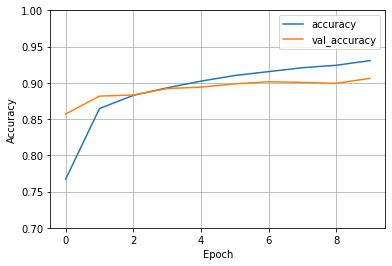

In [312]:
plot_loss(history, ylim=(0.7, 1))


In [313]:
predictions = cnn_model.predict(x_test)

In [314]:
print(predictions.shape)
print(y_test.shape)


(10000, 10)
(10000, 10)


Musíme transformovať "one-hot encoded labels" do 1D poľa, aby sme mohli vytvoriť "confusion matrix".


In [315]:
cmPredictions = predictions.argmax(axis=1)
cmYTest = y_test.argmax(axis=1)

print(cmPredictions.shape)
print(cmYTest.shape)

(10000,)
(10000,)


#COFUSION MATRIX 

In [316]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(cmYTest, cmPredictions)
print(cm)

[[835   2  25  19   4   1 107   0   7   0]
 [  1 975   2  15   4   0   1   0   2   0]
 [ 13   2 844   9  70   0  61   0   1   0]
 [ 16   5   7 923  17   0  27   0   5   0]
 [  0   1  63  39 853   0  42   0   2   0]
 [  0   0   0   1   0 977   0  14   0   8]
 [ 86   0  59  24  72   0 752   0   7   0]
 [  0   0   0   0   0   4   0 972   1  23]
 [  4   1   5   3   3   2   3   3 976   0]
 [  0   0   0   0   0   9   1  35   0 955]]


In [317]:
for i in range(cm.shape[0]):
   cm[i,i] = 0

In [318]:
coef = cm.argmax(axis = 1)
Maximum = np.where(cm == np.amax(cm))

for i in range(cm.shape[0]):

  print("%s was badly missclasified for %s: % i times." %(clothes_labels[i],clothes_labels[coef[i]],cm[i,coef[i]]))

print("---------------------------------------------------")

print("The worst out of all is % s missclasified for % s " %(clothes_labels[Maximum[0][0]],clothes_labels[Maximum[1][0]]))

T-shirt/top was badly missclasified for Shirt:  107 times.
Trouser was badly missclasified for Dress:  15 times.
Pullover was badly missclasified for Coat:  70 times.
Dress was badly missclasified for Shirt:  27 times.
Coat was badly missclasified for Pullover:  63 times.
Sandal was badly missclasified for Sneaker:  14 times.
Shirt was badly missclasified for T-shirt/top:  86 times.
Sneaker was badly missclasified for Ankle boot:  23 times.
Bag was badly missclasified for Pullover:  5 times.
Ankle boot was badly missclasified for Sneaker:  35 times.
---------------------------------------------------
The worst out of all is Shirt missclasified for T-shirt/top 


#16 najhorších predpovedí pomocou NN klasifikátora 

In [319]:
maximas = np.amax(predictions,axis = 1)
maximas1 = maximas[cmYTest != cmPredictions]

maximas1 = maximas1[(-maximas1).argsort()][0:16]

args = []
for i in maximas1:
  args.append(np.where(((maximas == i) & (cmYTest != cmPredictions)))[0][0])
  

Na obrázku nižšie vidíme 16 najhoršie predikovaných obrázkov. Keď sa pozrieme, či majpu spoločný znak, tka vidíme, že naša neurónová sieť má problém s rozproznávaním obrázkov v rámci **rovnakej kategórie**. Tj. Ankle boot - zaradilo ako sandals, alebo **sneakers** ako **ankle boot**. Ďalej niektoré zle určené obrázky sú ťažko rozpoznateľné aj pre človeka, kvôli zle fotografii. To je napríklad **dress** bolo označené ako **trousers**. 

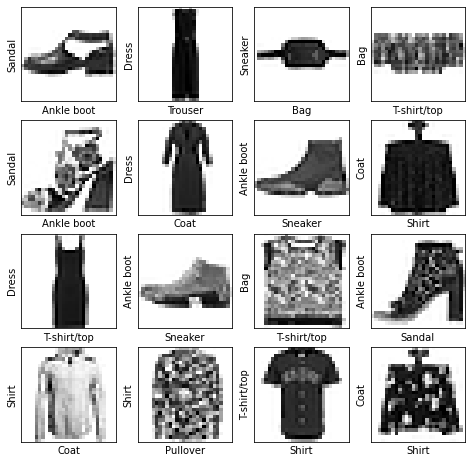

In [320]:
plt.figure(figsize=(8,8))
for i in range(1,17):
  plt.subplot(4, 4, i)
  plt.ylabel(clothes_labels[cmPredictions[args[i-1]]])
  plot_image(x_test[args[i-1]].squeeze(), clothes_labels[cmYTest[args[i-1]]])

##KNN klasifikátor 

In [239]:
x_train.shape

(60000, 28, 28, 1)

In [246]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [267]:
x_train1 = x_train.flatten().reshape(60000,28*28)
x_test1 = x_test.flatten().reshape(10000,28*28)

x_train1.shape, x_test1.shape

((60000, 784), (10000, 784))

In [263]:
KNclf = KNeighborsClassifier()

KNclf.fit(x_train1, y_train)
print(KNclf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [269]:
from sklearn import metrics

predictions = KNclf.predict(x_test1)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8554


Použité zdroje: 
1. https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
2. https://www.python-course.eu/confusion_matrix.php
3. https://www.pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/